In [354]:
import pandas as pd
import numpy as np

import joblib

In [355]:
pd.set_option('display.max_columns', None)

In [356]:
df = pd.read_csv('apostas_ai.csv')
df

C:\Users\erik\AppData\Local\Temp\ipykernel_488\3973131674.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('apostas_ai.csv')


,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,line,valor,odd,odd_bet,bet,saldo,status,cashouted,dataresultado,created_at,anular
0,64C875311855A,Online,96331,Simples,1,0,42553035,381,NaN,20000,4.40,NaN,2,-20000.0,Perdida,0,6/8/2023 22:07:31,1/8/2023 03:00:01,Nao
1,64C875346329E,Online,551358,Simples,0,0,42142657,222,sr:winning,1000,27.00,NaN,AT > 2,-1000.0,Perdida,0,2/8/2023 00:07:57,1/8/2023 03:00:04,Nao
2,64C87544EB54B,Online,551358,Simples,0,0,42142657,262,NaN,1000,35.00,NaN,0-1 0-2,-1000.0,Perdida,0,2/8/2023 00:07:57,1/8/2023 03:00:20,Nao
3,64C8754902D92,Online,204476,Multipla,0,0,0,0,0.00,2000,15.49,NaN,NaN,-2000.0,Perdida,0,2/8/2023 00:19:56,1/8/2023 03:00:25,Nao
4,64C8754FA8765,Online,573928,Multipla,0,0,0,0,0.00,5000,2.03,NaN,NaN,-5000.0,Perdida,0,1/8/2023 09:07:05,1/8/2023 03:00:31,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666138,65EB43A073748,Online,501627,Multipla,0,0,0,0,0.00,5000,99.21,NaN,NaN,0.0,Pendente,0,0/0/0 00:00:00,8/3/2024 16:58:08,Nao
23666139,65EB43A145E86,Online,470371,Simples,0,0,41893447,353,1.5,100000,1.48,NaN,Over,0.0,Pendente,0,0/0/0 00:00:00,8/3/2024 16:58:09,Nao
23666140,65EB43A247B12,Online,212597,Simples,0,0,41978671,554,NaN,10000,21.00,NaN,Yes / Yes,0.0,Pendente,0,0/0/0 00:00:00,8/3/2024 16:58:10,Nao
23666141,65EB43A24CF28,Online,336854,Multipla,0,0,0,0,0.00,1000,28.21,NaN,NaN,0.0,Pendente,0,0/0/0 00:00:00,8/3/2024 16:58:10,Nao


In [357]:
valor_maximo = df["valor"].max()
valor_maximo

55000000

In [358]:
valor_procurado = "6599B52249548"
colunas_com_valor = [col for col in df.columns if df[col].eq(valor_procurado).any()]

colunas_com_valor

['codigo']

In [359]:
errors = ['6599B52249548', '657A22A4BB414', '65E288A84957D', '65CFB43733FDD', '6584733D001B7']

# Filtrando o DataFrame para incluir apenas as linhas onde a coluna 'codigo' contém algum dos valores da lista.
df_error = df[df['codigo'].isin(errors)]

df_error


,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,line,valor,odd,odd_bet,bet,saldo,status,cashouted,dataresultado,created_at,anular
15816151,657A22A4BB414,Online,470019,Simples,1,0,43459185,8_157,NaN,100000,6.50,NaN,yes,-100000.0,Perdida,0,14/12/2023 12:34:01,13/12/2023 21:31:16,Nao
16439374,6584733D001B7,Area 4,3518886,Multipla,0,0,0,0,0.00,1900000,1.00,NaN,NaN,1900000.0,Anulada,0,22/12/2023 12:47:10,21/12/2023 17:50:17,Nao
17512433,6599B52249548,Online,43071,Simples,1,0,42134481,6_13,2,100000,6.50,NaN,x,650000.0,Ganha,0,6/1/2024 21:57:34,6/1/2024 20:16:34,Nao
21244002,65CFB43733FDD,Online,5628,Multipla,0,0,0,0,0.00,10000,4.56,NaN,NaN,45600.0,Ganha,0,16/2/2024 21:37:09,16/2/2024 19:15:03,Nao
22834638,65E288A84957D,Online,251462,Multipla,0,0,0,0,0.00,5000,3.14,NaN,NaN,15700.0,Ganha,0,2/3/2024 03:07:09,2/3/2024 02:02:16,Nao


In [360]:
'''
Columns description

codigo: Bet identifier code.
oficina: Location where the bet was placed.
client: Client identifier code.
tipo: Bet type (Single or Multiple).
live: Indicates if the bet was placed live (1) or not (0).
jogo: For the tipo column, if it is "Single": ID of the match. If "Multiple": always 0.
outcomeid: Identifier of the betting market (e.g., goal, foul, offside).
line: Related to the bet column, it complements the bet column in some types of bets (e.g., if bet is Over, line might be 1.5).
valor: Value of the bet.
odd: Multiplier of the bet.
bet: The specific outcome the user bet on (e.g., both teams to score, win by more than 3 goals).
saldo: Amount of money the user won from this bet.
status: Status of the bet.
cashouted: Indicates if the user chose to cash out the bet early.
dataresultado: The moment the bet was settled.
created_at: The moment the bet was placed.
'''

'\nColumns description\n\ncodigo: Bet identifier code.\noficina: Location where the bet was placed.\nclient: Client identifier code.\ntipo: Bet type (Single or Multiple).\nlive: Indicates if the bet was placed live (1) or not (0).\njogo: For the tipo column, if it is "Single": ID of the match. If "Multiple": always 0.\noutcomeid: Identifier of the betting market (e.g., goal, foul, offside).\nline: Related to the bet column, it complements the bet column in some types of bets (e.g., if bet is Over, line might be 1.5).\nvalor: Value of the bet.\nodd: Multiplier of the bet.\nbet: The specific outcome the user bet on (e.g., both teams to score, win by more than 3 goals).\nsaldo: Amount of money the user won from this bet.\nstatus: Status of the bet.\ncashouted: Indicates if the user chose to cash out the bet early.\ndataresultado: The moment the bet was settled.\ncreated_at: The moment the bet was placed.\n'

In [361]:
aaaaaaaaa = df[df['codigo'] == '6536E0D1960F2']
aaaaaaaaa

,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,line,valor,odd,odd_bet,bet,saldo,status,cashouted,dataresultado,created_at,anular
10302243,6536E0D1960F2,Online,152438,Simples,1,0,44622018,8_143,0.5,2000000,0.5,1.15,over,1000000.0,Ganha,1,23/10/2023 22:27:13,23/10/2023 21:08:33,Nao


In [362]:
# Converting the values to Euro
df['saldo'] = df['saldo'] / 8000
df['valor'] = df['valor'] / 8000


df.drop(['bet','line'], axis = 1, inplace=True)

df = df[df['tipo'] != 'Multipla']

# Sorting the df by highest saldo
df = df.sort_values(by='saldo', ascending=False)

average_bet_per_client = df.groupby('cliente')['valor'].mean().reset_index(name='avg_bet_amount')

# Merge this information back into your original DataFrame
df = df.merge(average_bet_per_client, on='cliente', how='left')

# Creating a new column with median value of bet
median_bet_per_client = df.groupby('cliente')['valor'].median().reset_index(name='median_bet_amount')

# Merge this information back into your original DataFrame
df = df.merge(median_bet_per_client, on='cliente', how='left')
df

,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,valor,odd,odd_bet,saldo,status,cashouted,dataresultado,created_at,anular,avg_bet_amount,median_bet_amount
0,654C226ACD71E,Online,288933,Simples,0,0,44943274,394,4375.0,2.37,NaN,10368.75,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:06:02,Nao,2052.105825,1875.0
1,654C213E37C0C,Online,325079,Simples,0,0,44943274,394,4375.0,2.37,NaN,10368.75,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:01:02,Nao,1620.773890,1387.5
2,65C014214B065,Online,508684,Simples,0,0,46477585,54,3375.0,2.75,NaN,9281.25,Ganha,0,5/2/2024 01:07:01,4/2/2024 22:48:01,Nao,1816.366016,1375.0
3,65BEB2A56E44F,Online,508684,Simples,0,0,47378665,51,4375.0,2.12,NaN,9275.00,Ganha,0,4/2/2024 00:47:01,3/2/2024 21:39:49,Nao,1816.366016,1375.0
4,65BE16BBD6167,Online,508684,Simples,0,0,42721883,353,3375.0,2.70,NaN,9112.50,Ganha,0,3/2/2024 15:47:26,3/2/2024 10:34:35,Nao,1816.366016,1375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210792,65BFC4515114E,Online,288933,Simples,0,0,46655355,272,4375.0,2.10,NaN,-4375.00,Perdida,0,4/2/2024 21:57:10,4/2/2024 17:07:29,Nao,2052.105825,1875.0
5210793,650EDF82353F5,Online,288933,Simples,0,0,41906931,42,4375.0,1.97,NaN,-4375.00,Perdida,0,23/9/2023 17:07:26,23/9/2023 12:52:18,Nao,2052.105825,1875.0
5210794,65BFC41095F91,Online,508684,Simples,0,0,46655355,272,4375.0,2.10,NaN,-4375.00,Perdida,0,4/2/2024 21:57:10,4/2/2024 17:06:24,Nao,1816.366016,1375.0
5210795,650EE0B83B819,Online,508684,Simples,0,0,41906931,271,4375.0,1.99,NaN,-4375.00,Perdida,0,23/9/2023 17:07:26,23/9/2023 12:57:28,Nao,1816.366016,1375.0


In [363]:
# Create a new column 'win' that is 1 if 'status' is 'Ganha', 0 if 'Perdida', and NaN otherwise
df['win'] = np.where(df['status'] == 'Ganha', 1, np.where(df['status'] == 'Perdida', 0, np.nan))

# Calculate the win rate as the mean of 'win' but ignoring NaN values
client_win_rates = df.groupby('cliente')['win'].mean().reset_index(name='win_rate')

# Merge this win rate back into the original DataFrame
df = df.merge(client_win_rates, on='cliente', how='left')

df.drop('win', axis=1, inplace=True)
# The DataFrame now has a 'win_rate' column for each client, ignoring statuses other than 'Ganha' or 'Perdida'
df

,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,valor,odd,odd_bet,saldo,status,cashouted,dataresultado,created_at,anular,avg_bet_amount,median_bet_amount,win_rate
0,654C226ACD71E,Online,288933,Simples,0,0,44943274,394,4375.0,2.37,NaN,10368.75,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:06:02,Nao,2052.105825,1875.0,0.652632
1,654C213E37C0C,Online,325079,Simples,0,0,44943274,394,4375.0,2.37,NaN,10368.75,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:01:02,Nao,1620.773890,1387.5,0.465116
2,65C014214B065,Online,508684,Simples,0,0,46477585,54,3375.0,2.75,NaN,9281.25,Ganha,0,5/2/2024 01:07:01,4/2/2024 22:48:01,Nao,1816.366016,1375.0,0.568421
3,65BEB2A56E44F,Online,508684,Simples,0,0,47378665,51,4375.0,2.12,NaN,9275.00,Ganha,0,4/2/2024 00:47:01,3/2/2024 21:39:49,Nao,1816.366016,1375.0,0.568421
4,65BE16BBD6167,Online,508684,Simples,0,0,42721883,353,3375.0,2.70,NaN,9112.50,Ganha,0,3/2/2024 15:47:26,3/2/2024 10:34:35,Nao,1816.366016,1375.0,0.568421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210792,65BFC4515114E,Online,288933,Simples,0,0,46655355,272,4375.0,2.10,NaN,-4375.00,Perdida,0,4/2/2024 21:57:10,4/2/2024 17:07:29,Nao,2052.105825,1875.0,0.652632
5210793,650EDF82353F5,Online,288933,Simples,0,0,41906931,42,4375.0,1.97,NaN,-4375.00,Perdida,0,23/9/2023 17:07:26,23/9/2023 12:52:18,Nao,2052.105825,1875.0,0.652632
5210794,65BFC41095F91,Online,508684,Simples,0,0,46655355,272,4375.0,2.10,NaN,-4375.00,Perdida,0,4/2/2024 21:57:10,4/2/2024 17:06:24,Nao,1816.366016,1375.0,0.568421
5210795,650EE0B83B819,Online,508684,Simples,0,0,41906931,271,4375.0,1.99,NaN,-4375.00,Perdida,0,23/9/2023 17:07:26,23/9/2023 12:57:28,Nao,1816.366016,1375.0,0.568421


In [364]:
df_winrate = df.copy()
df_winrate = df_winrate.sort_values(by='win_rate', ascending=False)
df_winrate

,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,valor,odd,odd_bet,saldo,status,cashouted,dataresultado,created_at,anular,avg_bet_amount,median_bet_amount,win_rate
748691,64E2814D37175,PJCG,4388958,Simples,0,0,43102821,381,1.875,2.90,NaN,5.43750,Ganha,0,21/8/2023 05:17:01,20/8/2023 21:15:07,Nao,1.875000,1.8750,1.0
1190941,6561F0014753F,Online,379325,Simples,1,0,41763091,6_13,0.625,2.60,NaN,1.62500,Ganha,0,25/11/2023 14:17:23,25/11/2023 13:00:49,Nao,4.406250,5.3750,1.0
998344,65A81FAAA0D0A,Online,286098,Simples,0,0,46420585,381,2.125,1.31,NaN,2.78375,Ganha,0,17/1/2024 22:17:01,17/1/2024 18:42:50,Nao,1.264063,1.1875,1.0
614024,64CC587B02447,Online,427324,Simples,1,0,42440395,6_13,6.250,1.25,NaN,7.81250,Ganha,0,4/8/2023 01:57:19,4/8/2023 01:46:35,Nao,6.250000,6.2500,1.0
771463,64F0EC13B68AE,jklamb,3967631,Simples,0,0,42897061,208,1.250,4.10,NaN,5.12500,Ganha,0,1/9/2023 02:27:21,31/8/2023 19:38:51,Nao,1.250000,1.2500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544382,65EB119D8D18A,Online,616466,Simples,0,0,42134667,381,1.250,1.63,NaN,0.00000,Pendente,0,0/0/0 00:00:00,8/3/2024 13:24:45,Nao,1.250000,1.2500,NaN
1544401,65EB119D813B7,Online,616466,Simples,0,0,46188033,381,1.250,2.03,NaN,0.00000,Pendente,0,0/0/0 00:00:00,8/3/2024 13:24:45,Nao,1.250000,1.2500,NaN
1544408,65EB119D85FDE,Online,616466,Simples,0,0,46188029,381,1.250,2.60,NaN,0.00000,Pendente,0,0/0/0 00:00:00,8/3/2024 13:24:45,Nao,1.250000,1.2500,NaN
1544471,65EB119D94F9A,Online,616466,Simples,0,0,42146609,381,1.250,1.19,NaN,0.00000,Pendente,0,0/0/0 00:00:00,8/3/2024 13:24:45,Nao,1.250000,1.2500,NaN


In [365]:
#df_cleaned = df[df['tipo'] != 'Multipla']

# df_filtered now contains only the rows where 'tipo' is not 'Multipla'

#df_cleaned.drop(['contaid','odd_bet','anular'], axis = 1, inplace=True)
#df_cleaned

In [366]:
fraudulent = df[df['status'].isin(['Ganha', 'Anulada'])]
fraudulent

,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,valor,odd,odd_bet,saldo,status,cashouted,dataresultado,created_at,anular,avg_bet_amount,median_bet_amount,win_rate
0,654C226ACD71E,Online,288933,Simples,0,0,44943274,394,4375.0000,2.37,NaN,10368.750000,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:06:02,Nao,2052.105825,1875.0000,0.652632
1,654C213E37C0C,Online,325079,Simples,0,0,44943274,394,4375.0000,2.37,NaN,10368.750000,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:01:02,Nao,1620.773890,1387.5000,0.465116
2,65C014214B065,Online,508684,Simples,0,0,46477585,54,3375.0000,2.75,NaN,9281.250000,Ganha,0,5/2/2024 01:07:01,4/2/2024 22:48:01,Nao,1816.366016,1375.0000,0.568421
3,65BEB2A56E44F,Online,508684,Simples,0,0,47378665,51,4375.0000,2.12,NaN,9275.000000,Ganha,0,4/2/2024 00:47:01,3/2/2024 21:39:49,Nao,1816.366016,1375.0000,0.568421
4,65BE16BBD6167,Online,508684,Simples,0,0,42721883,353,3375.0000,2.70,NaN,9112.500000,Ganha,0,3/2/2024 15:47:26,3/2/2024 10:34:35,Nao,1816.366016,1375.0000,0.568421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539715,6509C366A438B,Online,583478,Simples,0,0,43459069,381,0.0125,0.85,1.13,0.010625,Ganha,1,19/9/2023 17:21:20,19/9/2023 15:51:02,Nao,0.049797,0.0125,0.597826
1539716,6509C3668F915,Online,583478,Simples,1,0,43458493,381,0.0125,0.84,2.27,0.010500,Ganha,1,19/9/2023 17:22:17,19/9/2023 15:51:02,Nao,0.049797,0.0125,0.597826
1539717,6521DA99B8F1F,Online,583478,Simples,1,0,44186166,381,0.0125,0.71,2.14,0.008875,Ganha,1,7/10/2023 23:55:20,7/10/2023 22:24:25,Nao,0.049797,0.0125,0.597826
1539718,6509C36693CF1,Online,583478,Simples,1,0,43458931,381,0.0125,0.71,1.51,0.008875,Ganha,1,19/9/2023 17:22:31,19/9/2023 15:51:02,Nao,0.049797,0.0125,0.597826


In [367]:
# Agrupa por 'cliente' e soma as colunas 'valor' e 'saldo'
grouped_df = fraudulent.groupby('cliente')[['valor', 'saldo']].sum().reset_index()

# Calcula a divisão de 'saldo' por 'valor' para cada cliente
grouped_df['ratio'] = grouped_df['saldo'] / grouped_df['valor']

# Mostra o resultado
grouped_df


,cliente,valor,saldo,ratio
0,5001,59.259125,160.052181,2.700887
1,5002,5638.553875,10671.928560,1.892671
2,5007,1.875000,1.875000,1.000000
3,5013,137.350000,440.739250,3.208877
4,5017,6.250000,14.643750,2.343000
...,...,...,...,...
45610,99111674,6.250000,9.187500,1.470000
45611,108630108,75.000000,232.500000,3.100000
45612,155041897,6.250000,10.312500,1.650000
45613,569118347,2.312500,6.584375,2.847297


In [368]:
grouped_df_sorted_desc = grouped_df.sort_values(by='ratio', ascending=False)
grouped_df_sorted_desc


,cliente,valor,saldo,ratio
31518,462293,0.250,12.5000,50.000
5642,77791,0.125,6.2500,50.000
25754,356695,2.500,125.0000,50.000
17970,247720,0.625,31.2500,50.000
43882,5049087,1.250,62.5000,50.000
...,...,...,...,...
38246,589165,6.250,1.9375,0.310
39759,605059,2.500,0.7250,0.290
37913,585428,2.500,0.6375,0.255
6920,96495,12.500,2.8750,0.230


In [369]:
# Mesclar 'df' original com 'grouped_df' (que contém a coluna 'ratio') baseado na coluna 'cliente'
# Aqui, assumimos que você deseja manter todas as linhas originais do df e adicionar a coluna 'ratio' a elas
fraudulent = fraudulent.merge(grouped_df[['cliente', 'ratio']], on='cliente', how='left')
# Agora, 'df_merged' contém todas as colunas originais do 'df' mais a coluna 'ratio' calculada
fraudulent

,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,valor,odd,odd_bet,saldo,status,cashouted,dataresultado,created_at,anular,avg_bet_amount,median_bet_amount,win_rate,ratio
0,654C226ACD71E,Online,288933,Simples,0,0,44943274,394,4375.0000,2.37,NaN,10368.750000,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:06:02,Nao,2052.105825,1875.0000,0.652632,2.276755
1,654C213E37C0C,Online,325079,Simples,0,0,44943274,394,4375.0000,2.37,NaN,10368.750000,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:01:02,Nao,1620.773890,1387.5000,0.465116,2.220075
2,65C014214B065,Online,508684,Simples,0,0,46477585,54,3375.0000,2.75,NaN,9281.250000,Ganha,0,5/2/2024 01:07:01,4/2/2024 22:48:01,Nao,1816.366016,1375.0000,0.568421,2.283714
3,65BEB2A56E44F,Online,508684,Simples,0,0,47378665,51,4375.0000,2.12,NaN,9275.000000,Ganha,0,4/2/2024 00:47:01,3/2/2024 21:39:49,Nao,1816.366016,1375.0000,0.568421,2.283714
4,65BE16BBD6167,Online,508684,Simples,0,0,42721883,353,3375.0000,2.70,NaN,9112.500000,Ganha,0,3/2/2024 15:47:26,3/2/2024 10:34:35,Nao,1816.366016,1375.0000,0.568421,2.283714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539715,6509C366A438B,Online,583478,Simples,0,0,43459069,381,0.0125,0.85,1.13,0.010625,Ganha,1,19/9/2023 17:21:20,19/9/2023 15:51:02,Nao,0.049797,0.0125,0.597826,1.673573
1539716,6509C3668F915,Online,583478,Simples,1,0,43458493,381,0.0125,0.84,2.27,0.010500,Ganha,1,19/9/2023 17:22:17,19/9/2023 15:51:02,Nao,0.049797,0.0125,0.597826,1.673573
1539717,6521DA99B8F1F,Online,583478,Simples,1,0,44186166,381,0.0125,0.71,2.14,0.008875,Ganha,1,7/10/2023 23:55:20,7/10/2023 22:24:25,Nao,0.049797,0.0125,0.597826,1.673573
1539718,6509C36693CF1,Online,583478,Simples,1,0,43458931,381,0.0125,0.71,1.51,0.008875,Ganha,1,19/9/2023 17:22:31,19/9/2023 15:51:02,Nao,0.049797,0.0125,0.597826,1.673573


In [370]:
fraudulent = fraudulent[fraudulent['valor'] > 5 * fraudulent['avg_bet_amount']]
fraudulent

,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,valor,odd,odd_bet,saldo,status,cashouted,dataresultado,created_at,anular,avg_bet_amount,median_bet_amount,win_rate,ratio
29,65D10C117742E,Online,541360,Simples,1,0,46655451,381,4563.160000,1.66,NaN,7574.845600,Ganha,0,17/2/2024 21:57:27,17/2/2024 19:42:09,Nao,227.394950,62.50000,0.637975,1.270051
36,65DE76548726A,Online,541360,Simples,0,0,46325901,323,6875.000000,1.08,NaN,7425.000000,Ganha,0,28/2/2024 02:47:03,27/2/2024 23:55:00,Nao,227.394950,62.50000,0.637975,1.270051
59,657E2901EA40E,Online,73382,Simples,0,0,45434300,51,3077.500000,1.86,NaN,5724.150000,Ganha,0,17/12/2023 01:27:01,16/12/2023 22:47:29,Nao,591.127875,155.12500,0.483333,2.298975
65,657C714727954,Online,351886,Simples,0,0,46015855,52,3750.000000,1.44,NaN,5400.000000,Ganha,0,15/12/2023 17:57:01,15/12/2023 15:31:19,Nao,163.551790,62.50000,0.633574,1.423443
66,657BD11627438,Online,351886,Simples,0,0,43255191,43,3750.000000,1.42,NaN,5325.000000,Ganha,0,15/12/2023 09:07:01,15/12/2023 04:07:50,Nao,163.551790,62.50000,0.633574,1.423443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485175,655250C160E09,Online,551462,Simples,0,0,45339616,382,0.082125,1.44,NaN,0.118260,Ganha,0,13/11/2023 17:17:01,13/11/2023 16:37:21,Nao,0.015364,0.01250,0.611268,1.456232
1486136,656CC099CFB0F,Online,551462,Simples,0,0,45868915,382,0.082625,1.38,NaN,0.114022,Ganha,0,3/12/2023 18:27:12,3/12/2023 17:53:29,Nao,0.015364,0.01250,0.611268,1.456232
1487288,65452E2E211A4,Online,551462,Simples,0,0,44814002,382,0.088125,1.25,NaN,0.110156,Ganha,0,3/11/2023 21:47:11,3/11/2023 17:30:22,Nao,0.015364,0.01250,0.611268,1.456232
1488564,650A2F85EA530,Online,173752,Simples,0,0,39464189,571,0.125250,0.85,24.0,0.106463,Ganha,1,19/9/2023 23:32:40,19/9/2023 23:32:21,Nao,0.016930,0.01375,0.048517,12.387551


In [371]:
fraudulent = fraudulent[fraudulent['saldo'] > 3000]
fraudulent.shape

(35, 21)

In [372]:
fraudulent['possible_fraud'] = 1
fraudulent

C:\Users\erik\AppData\Local\Temp\ipykernel_488\942183243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent['possible_fraud'] = 1


,codigo,oficina,cliente,tipo,live,contaid,jogo,outcomeid,valor,odd,odd_bet,saldo,status,cashouted,dataresultado,created_at,anular,avg_bet_amount,median_bet_amount,win_rate,ratio,possible_fraud
29,65D10C117742E,Online,541360,Simples,1,0,46655451,381,4563.160000,1.66,NaN,7574.845600,Ganha,0,17/2/2024 21:57:27,17/2/2024 19:42:09,Nao,227.394950,62.500,0.637975,1.270051,1
36,65DE76548726A,Online,541360,Simples,0,0,46325901,323,6875.000000,1.08,NaN,7425.000000,Ganha,0,28/2/2024 02:47:03,27/2/2024 23:55:00,Nao,227.394950,62.500,0.637975,1.270051,1
59,657E2901EA40E,Online,73382,Simples,0,0,45434300,51,3077.500000,1.86,NaN,5724.150000,Ganha,0,17/12/2023 01:27:01,16/12/2023 22:47:29,Nao,591.127875,155.125,0.483333,2.298975,1
65,657C714727954,Online,351886,Simples,0,0,46015855,52,3750.000000,1.44,NaN,5400.000000,Ganha,0,15/12/2023 17:57:01,15/12/2023 15:31:19,Nao,163.551790,62.500,0.633574,1.423443,1
66,657BD11627438,Online,351886,Simples,0,0,43255191,43,3750.000000,1.42,NaN,5325.000000,Ganha,0,15/12/2023 09:07:01,15/12/2023 04:07:50,Nao,163.551790,62.500,0.633574,1.423443,1
67,6527E9614BEB0,Online,541360,Simples,0,0,36601115,276,4468.850000,1.18,NaN,5273.243000,Ganha,0,12/10/2023 20:47:11,12/10/2023 12:41:05,Nao,227.394950,62.500,0.637975,1.270051,1
68,653D0A610A57F,Online,541360,Simples,1,0,44609992,46,4375.000000,1.20,NaN,5250.000000,Ganha,0,29/10/2023 01:27:01,28/10/2023 13:19:29,Nao,227.394950,62.500,0.637975,1.270051,1
69,6510F5FB128EC,Online,319768,Simples,1,0,41893031,47,2502.473125,2.09,NaN,5230.168831,Ganha,0,27/9/2023 18:57:17,25/9/2023 02:52:43,Nao,295.296822,125.000,0.713004,1.385676,1
77,65BE74498402B,Online,571105,Simples,0,0,42491715,51,2500.000000,1.96,NaN,4900.000000,Ganha,0,4/2/2024 00:07:01,3/2/2024 17:13:45,Nao,238.630879,125.000,0.412088,1.954208,1
81,65CFA60214D5F,Online,541360,Simples,1,0,41763333,47,4750.000000,1.44,NaN,4750.000000,Anulada,0,17/2/2024 17:07:46,16/2/2024 18:14:26,Nao,227.394950,62.500,0.637975,1.270051,1


In [373]:
df_cleaned = df.copy()

# df_filtered now contains only the rows where 'tipo' is not 'Multipla'

df_cleaned.drop(['contaid','odd_bet','anular'], axis = 1, inplace=True)
df_cleaned

,codigo,oficina,cliente,tipo,live,jogo,outcomeid,valor,odd,saldo,status,cashouted,dataresultado,created_at,avg_bet_amount,median_bet_amount,win_rate
0,654C226ACD71E,Online,288933,Simples,0,44943274,394,4375.0,2.37,10368.75,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:06:02,2052.105825,1875.0,0.652632
1,654C213E37C0C,Online,325079,Simples,0,44943274,394,4375.0,2.37,10368.75,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:01:02,1620.773890,1387.5,0.465116
2,65C014214B065,Online,508684,Simples,0,46477585,54,3375.0,2.75,9281.25,Ganha,0,5/2/2024 01:07:01,4/2/2024 22:48:01,1816.366016,1375.0,0.568421
3,65BEB2A56E44F,Online,508684,Simples,0,47378665,51,4375.0,2.12,9275.00,Ganha,0,4/2/2024 00:47:01,3/2/2024 21:39:49,1816.366016,1375.0,0.568421
4,65BE16BBD6167,Online,508684,Simples,0,42721883,353,3375.0,2.70,9112.50,Ganha,0,3/2/2024 15:47:26,3/2/2024 10:34:35,1816.366016,1375.0,0.568421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210792,65BFC4515114E,Online,288933,Simples,0,46655355,272,4375.0,2.10,-4375.00,Perdida,0,4/2/2024 21:57:10,4/2/2024 17:07:29,2052.105825,1875.0,0.652632
5210793,650EDF82353F5,Online,288933,Simples,0,41906931,42,4375.0,1.97,-4375.00,Perdida,0,23/9/2023 17:07:26,23/9/2023 12:52:18,2052.105825,1875.0,0.652632
5210794,65BFC41095F91,Online,508684,Simples,0,46655355,272,4375.0,2.10,-4375.00,Perdida,0,4/2/2024 21:57:10,4/2/2024 17:06:24,1816.366016,1375.0,0.568421
5210795,650EE0B83B819,Online,508684,Simples,0,41906931,271,4375.0,1.99,-4375.00,Perdida,0,23/9/2023 17:07:26,23/9/2023 12:57:28,1816.366016,1375.0,0.568421


In [374]:
df_cleaned['possible_fraud'] = 0

# Para cada 'cliente' em 'fraudulent', marque como 1 em 'df'
for idx in fraudulent.index:
    df_cleaned.at[idx, 'possible_fraud'] = 1

df_cleaned['possible_fraud'].value_counts()

possible_fraud
0    5210762
1         35
Name: count, dtype: int64

In [375]:
df_cleaned = df_cleaned[df_cleaned['status'].isin(['Ganha', 'Anulada'])]


In [376]:
df_cleaned

,codigo,oficina,cliente,tipo,live,jogo,outcomeid,valor,odd,saldo,status,cashouted,dataresultado,created_at,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
0,654C226ACD71E,Online,288933,Simples,0,44943274,394,4375.0000,2.37,10368.750000,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:06:02,2052.105825,1875.0000,0.652632,0
1,654C213E37C0C,Online,325079,Simples,0,44943274,394,4375.0000,2.37,10368.750000,Ganha,0,9/11/2023 02:37:02,9/11/2023 00:01:02,1620.773890,1387.5000,0.465116,0
2,65C014214B065,Online,508684,Simples,0,46477585,54,3375.0000,2.75,9281.250000,Ganha,0,5/2/2024 01:07:01,4/2/2024 22:48:01,1816.366016,1375.0000,0.568421,0
3,65BEB2A56E44F,Online,508684,Simples,0,47378665,51,4375.0000,2.12,9275.000000,Ganha,0,4/2/2024 00:47:01,3/2/2024 21:39:49,1816.366016,1375.0000,0.568421,0
4,65BE16BBD6167,Online,508684,Simples,0,42721883,353,3375.0000,2.70,9112.500000,Ganha,0,3/2/2024 15:47:26,3/2/2024 10:34:35,1816.366016,1375.0000,0.568421,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539715,6509C366A438B,Online,583478,Simples,0,43459069,381,0.0125,0.85,0.010625,Ganha,1,19/9/2023 17:21:20,19/9/2023 15:51:02,0.049797,0.0125,0.597826,0
1539716,6509C3668F915,Online,583478,Simples,1,43458493,381,0.0125,0.84,0.010500,Ganha,1,19/9/2023 17:22:17,19/9/2023 15:51:02,0.049797,0.0125,0.597826,0
1539717,6521DA99B8F1F,Online,583478,Simples,1,44186166,381,0.0125,0.71,0.008875,Ganha,1,7/10/2023 23:55:20,7/10/2023 22:24:25,0.049797,0.0125,0.597826,0
1539718,6509C36693CF1,Online,583478,Simples,1,43458931,381,0.0125,0.71,0.008875,Ganha,1,19/9/2023 17:22:31,19/9/2023 15:51:02,0.049797,0.0125,0.597826,0


In [377]:
df_cleaned.to_csv('start_ml.csv', index=False)

# Start of machine learning


In [378]:
df_cleaned.isnull().sum()

codigo                 0
oficina                0
cliente                0
tipo                   0
live                   0
jogo                   0
outcomeid              0
valor                  0
odd                    0
saldo                  0
status                 0
cashouted              0
dataresultado          0
created_at             0
avg_bet_amount         0
median_bet_amount      0
win_rate             181
possible_fraud         0
dtype: int64

In [379]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539720 entries, 0 to 1539719
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   codigo             1539720 non-null  object 
 1   oficina            1539720 non-null  object 
 2   cliente            1539720 non-null  int64  
 3   tipo               1539720 non-null  object 
 4   live               1539720 non-null  int64  
 5   jogo               1539720 non-null  int64  
 6   outcomeid          1539720 non-null  object 
 7   valor              1539720 non-null  float64
 8   odd                1539720 non-null  float64
 9   saldo              1539720 non-null  float64
 10  status             1539720 non-null  object 
 11  cashouted          1539720 non-null  int64  
 12  dataresultado      1539720 non-null  object 
 13  created_at         1539720 non-null  object 
 14  avg_bet_amount     1539720 non-null  float64
 15  median_bet_amount  1539720 non-null  

In [380]:
suspicious_live = df_cleaned[df_cleaned['live'] == 1]
suspicious_live

,codigo,oficina,cliente,tipo,live,jogo,outcomeid,valor,odd,saldo,status,cashouted,dataresultado,created_at,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
20,6566501598471,Online,288933,Simples,1,42787931,381,3125.000000,2.65,8281.250000,Ganha,0,28/11/2023 23:57:02,28/11/2023 20:39:49,2052.105825,1875.0000,0.652632,0
29,65D10C117742E,Online,541360,Simples,1,46655451,381,4563.160000,1.66,7574.845600,Ganha,0,17/2/2024 21:57:27,17/2/2024 19:42:09,227.394950,62.5000,0.637975,1
46,656651B858B78,Online,73382,Simples,1,42787931,381,2500.000000,2.65,6625.000000,Ganha,0,28/11/2023 23:57:02,28/11/2023 20:46:48,591.127875,155.1250,0.483333,0
68,653D0A610A57F,Online,541360,Simples,1,44609992,46,4375.000000,1.20,5250.000000,Ganha,0,29/10/2023 01:27:01,28/10/2023 13:19:29,227.394950,62.5000,0.637975,1
69,6510F5FB128EC,Online,319768,Simples,1,41893031,47,2502.473125,2.09,5230.168831,Ganha,0,27/9/2023 18:57:17,25/9/2023 02:52:43,295.296822,125.0000,0.713004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539663,65E4FF9ED2283,Online,399565,Simples,1,48208755,381,0.012500,0.85,0.010625,Ganha,1,7/3/2024 00:46:29,3/3/2024 22:54:22,0.016431,0.0125,0.333333,0
1539716,6509C3668F915,Online,583478,Simples,1,43458493,381,0.012500,0.84,0.010500,Ganha,1,19/9/2023 17:22:17,19/9/2023 15:51:02,0.049797,0.0125,0.597826,0
1539717,6521DA99B8F1F,Online,583478,Simples,1,44186166,381,0.012500,0.71,0.008875,Ganha,1,7/10/2023 23:55:20,7/10/2023 22:24:25,0.049797,0.0125,0.597826,0
1539718,6509C36693CF1,Online,583478,Simples,1,43458931,381,0.012500,0.71,0.008875,Ganha,1,19/9/2023 17:22:31,19/9/2023 15:51:02,0.049797,0.0125,0.597826,0


In [381]:
teste1 = suspicious_live[suspicious_live['jogo'] == 42897061]
teste1

,codigo,oficina,cliente,tipo,live,jogo,outcomeid,valor,odd,saldo,status,cashouted,dataresultado,created_at,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
933,64F13A3DD0B0E,Online,525766,Simples,1,42897061,6_149,375.0000,3.05,1143.75000,Ganha,0,1/9/2023 02:28:03,1/9/2023 01:11:25,248.626743,126.062500,0.400000,0
1428,64F131FF9EA4D,Online,41955,Simples,1,42897061,8_143,312.5000,2.85,890.62500,Ganha,0,1/9/2023 02:17:14,1/9/2023 00:36:15,114.678735,68.125000,0.337423,0
2228,64F1483271A40,Online,13518,Simples,1,42897061,6_13,187.5000,3.80,712.50000,Ganha,0,1/9/2023 02:28:19,1/9/2023 02:10:58,122.278800,125.000000,0.261607,0
2253,64F13740B9BD3,Online,257094,Simples,1,42897061,8_159,375.0000,1.90,712.50000,Ganha,0,1/9/2023 02:07:14,1/9/2023 00:58:40,104.206102,62.500000,0.565476,0
2765,64F13E2C10C07,Online,23162,Simples,1,42897061,6_149,125.0000,5.20,650.00000,Ganha,0,1/9/2023 02:28:07,1/9/2023 01:28:12,98.884615,62.500000,0.358974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518252,64F103C7A31AD,Online,212101,Simples,1,42897061,381,0.0125,2.22,0.02775,Ganha,0,1/9/2023 02:27:26,31/8/2023 21:19:03,1.033507,0.025000,0.612903,0
1518272,64F0DFB097A13,Online,589669,Simples,1,42897061,381,0.0125,2.22,0.02775,Ganha,0,1/9/2023 02:27:20,31/8/2023 18:45:04,0.250274,0.062500,0.108108,0
1520814,64F12E9ED3A7E,Online,403755,Simples,1,42897061,52,0.0125,1.90,0.02375,Ganha,0,1/9/2023 02:17:13,1/9/2023 00:21:50,0.303818,0.157312,0.464789,0
1529363,64F12626C9320,Online,331796,Simples,1,42897061,46,0.0125,1.34,0.01675,Ganha,0,1/9/2023 02:27:42,31/8/2023 23:45:42,0.489784,0.125000,0.416058,0


In [382]:
teste1.dtypes

codigo                object
oficina               object
cliente                int64
tipo                  object
live                   int64
jogo                   int64
outcomeid             object
valor                float64
odd                  float64
saldo                float64
status                object
cashouted              int64
dataresultado         object
created_at            object
avg_bet_amount       float64
median_bet_amount    float64
win_rate             float64
possible_fraud         int64
dtype: object

In [383]:
suspicious_live.to_csv('gpt_group2.csv', index=False)

In [384]:
df_fraud = df_cleaned[df_cleaned['possible_fraud'] == 1].copy()

In [385]:
df_fraud

,codigo,oficina,cliente,tipo,live,jogo,outcomeid,valor,odd,saldo,status,cashouted,dataresultado,created_at,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
29,65D10C117742E,Online,541360,Simples,1,46655451,381,4563.160000,1.66,7574.845600,Ganha,0,17/2/2024 21:57:27,17/2/2024 19:42:09,227.394950,62.500,0.637975,1
36,65DE76548726A,Online,541360,Simples,0,46325901,323,6875.000000,1.08,7425.000000,Ganha,0,28/2/2024 02:47:03,27/2/2024 23:55:00,227.394950,62.500,0.637975,1
59,657E2901EA40E,Online,73382,Simples,0,45434300,51,3077.500000,1.86,5724.150000,Ganha,0,17/12/2023 01:27:01,16/12/2023 22:47:29,591.127875,155.125,0.483333,1
65,657C714727954,Online,351886,Simples,0,46015855,52,3750.000000,1.44,5400.000000,Ganha,0,15/12/2023 17:57:01,15/12/2023 15:31:19,163.551790,62.500,0.633574,1
66,657BD11627438,Online,351886,Simples,0,43255191,43,3750.000000,1.42,5325.000000,Ganha,0,15/12/2023 09:07:01,15/12/2023 04:07:50,163.551790,62.500,0.633574,1
67,6527E9614BEB0,Online,541360,Simples,0,36601115,276,4468.850000,1.18,5273.243000,Ganha,0,12/10/2023 20:47:11,12/10/2023 12:41:05,227.394950,62.500,0.637975,1
68,653D0A610A57F,Online,541360,Simples,1,44609992,46,4375.000000,1.20,5250.000000,Ganha,0,29/10/2023 01:27:01,28/10/2023 13:19:29,227.394950,62.500,0.637975,1
69,6510F5FB128EC,Online,319768,Simples,1,41893031,47,2502.473125,2.09,5230.168831,Ganha,0,27/9/2023 18:57:17,25/9/2023 02:52:43,295.296822,125.000,0.713004,1
77,65BE74498402B,Online,571105,Simples,0,42491715,51,2500.000000,1.96,4900.000000,Ganha,0,4/2/2024 00:07:01,3/2/2024 17:13:45,238.630879,125.000,0.412088,1
81,65CFA60214D5F,Online,541360,Simples,1,41763333,47,4750.000000,1.44,4750.000000,Anulada,0,17/2/2024 17:07:46,16/2/2024 18:14:26,227.394950,62.500,0.637975,1


In [386]:
df['odd'].describe()

count    5.210797e+06
mean     8.331202e+00
std      1.175672e+01
min      1.400000e-01
25%      2.000000e+00
50%      3.150000e+00
75%      9.000000e+00
max      1.000000e+02
Name: odd, dtype: float64

In [387]:
df_fraud['jogo'].value_counts()

jogo
45785609    2
46655451    1
43065711    1
43231773    1
43029637    1
41893301    1
46188019    1
41977079    1
43029619    1
36601695    1
46325901    1
43066585    1
44832802    1
42824601    1
42857915    1
39439491    1
43065851    1
43068653    1
45625956    1
39439743    1
43841009    1
43459069    1
42129343    1
47438735    1
46295665    1
41763333    1
42491715    1
41893031    1
44609992    1
36601115    1
43255191    1
46015855    1
45434300    1
46655455    1
Name: count, dtype: int64

In [388]:
df_cleaned.drop(['codigo', 'tipo', 'jogo', 'outcomeid', 'dataresultado', 'created_at'], axis=1, inplace=True)
df_cleaned

C:\Users\erik\AppData\Local\Temp\ipykernel_488\2377817169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(['codigo', 'tipo', 'jogo', 'outcomeid', 'dataresultado', 'created_at'], axis=1, inplace=True)


,oficina,cliente,live,valor,odd,saldo,status,cashouted,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
0,Online,288933,0,4375.0000,2.37,10368.750000,Ganha,0,2052.105825,1875.0000,0.652632,0
1,Online,325079,0,4375.0000,2.37,10368.750000,Ganha,0,1620.773890,1387.5000,0.465116,0
2,Online,508684,0,3375.0000,2.75,9281.250000,Ganha,0,1816.366016,1375.0000,0.568421,0
3,Online,508684,0,4375.0000,2.12,9275.000000,Ganha,0,1816.366016,1375.0000,0.568421,0
4,Online,508684,0,3375.0000,2.70,9112.500000,Ganha,0,1816.366016,1375.0000,0.568421,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1539715,Online,583478,0,0.0125,0.85,0.010625,Ganha,1,0.049797,0.0125,0.597826,0
1539716,Online,583478,1,0.0125,0.84,0.010500,Ganha,1,0.049797,0.0125,0.597826,0
1539717,Online,583478,1,0.0125,0.71,0.008875,Ganha,1,0.049797,0.0125,0.597826,0
1539718,Online,583478,1,0.0125,0.71,0.008875,Ganha,1,0.049797,0.0125,0.597826,0


In [389]:
df_cleaned['possible_fraud'].value_counts()

possible_fraud
0    1539685
1         35
Name: count, dtype: int64

In [390]:
# Define the fraud conditions
condition_win_rate = df_cleaned['win_rate'] > 0.5
condition_valor = df_cleaned['valor'] > 1000
condition_odd = df_cleaned['odd'] > 1.5

# Combine the conditions to identify possible new frauds
new_fraudulent_conditions = condition_win_rate & condition_valor & condition_odd

# Update the 'possible_fraud' column only for rows that aren't already labeled as fraud
# This keeps existing fraud labels (1) and updates the column based on the new conditions
df_cleaned['possible_fraud'] = np.where(df_cleaned['possible_fraud'] == 1, 1, new_fraudulent_conditions.astype(int))

df_cleaned['possible_fraud'].value_counts()

C:\Users\erik\AppData\Local\Temp\ipykernel_488\190322475.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['possible_fraud'] = np.where(df_cleaned['possible_fraud'] == 1, 1, new_fraudulent_conditions.astype(int))


possible_fraud
0    1539526
1        194
Name: count, dtype: int64

In [391]:
df_cleaned.to_csv('gpt_again.csv',index=False)

In [392]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1539720 entries, 0 to 1539719
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   oficina            1539720 non-null  object 
 1   cliente            1539720 non-null  int64  
 2   live               1539720 non-null  int64  
 3   valor              1539720 non-null  float64
 4   odd                1539720 non-null  float64
 5   saldo              1539720 non-null  float64
 6   status             1539720 non-null  object 
 7   cashouted          1539720 non-null  int64  
 8   avg_bet_amount     1539720 non-null  float64
 9   median_bet_amount  1539720 non-null  float64
 10  win_rate           1539539 non-null  float64
 11  possible_fraud     1539720 non-null  int32  
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 146.8+ MB


In [393]:
df_cleaned.dropna(inplace=True)

C:\Users\erik\AppData\Local\Temp\ipykernel_488\2343921619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [394]:
# Assuming df_cleaned is your DataFrame
# Step 1: Count bets per cliente
#bets_per_cliente = df_cleaned['cliente'].value_counts()

# Step 2: Choose a threshold
#threshold = 6  # Adjust as needed

# Step 3: Identify rare clientes
#rare_clientes = bets_per_cliente[bets_per_cliente < threshold].index.tolist()

# Step 4: Categorize clientes in the DataFrame
#df_cleaned['cliente_group'] = df_cleaned['cliente'].apply(lambda x: 'Rare' if x in rare_clientes else 'Frequent')

# Step 5: Check the new distribution
#print(df_cleaned['cliente_group'].value_counts())


In [395]:
df_cleaned = df_cleaned.drop('oficina', axis=1)
df_cleaned['status'] = df_cleaned['status'].replace({'Ganha': 1, 'Anulada': 0})

C:\Users\erik\AppData\Local\Temp\ipykernel_488\4016060349.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['status'] = df_cleaned['status'].replace({'Ganha': 1, 'Anulada': 0})


In [399]:
sorted_df_test = df_cleaned.sort_values(by='avg_bet_amount', ascending=False)
sorted_df_test = sorted_df_test[sorted_df_test['possible_fraud'] == 0]
sorted_df_test

,cliente,live,valor,odd,saldo,status,cashouted,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
1067,288933,0,625.0000,1.71,1068.750000,1,0,2052.105825,1875.0000,0.652632,0
323,288933,0,625.0000,3.70,2312.500000,1,0,2052.105825,1875.0000,0.652632,0
1770,288933,0,375.0000,2.12,795.000000,1,0,2052.105825,1875.0000,0.652632,0
893,288933,0,625.0000,1.88,1175.000000,1,0,2052.105825,1875.0000,0.652632,0
391,288933,0,625.0000,3.25,2031.250000,1,0,2052.105825,1875.0000,0.652632,0
...,...,...,...,...,...,...,...,...,...,...,...
1532517,219391,0,0.0125,1.24,0.015500,1,0,0.012500,0.0125,0.790000,0
1531257,219391,0,0.0125,1.28,0.016000,1,0,0.012500,0.0125,0.790000,0
1514008,538887,0,0.0125,2.90,0.036250,1,0,0.012500,0.0125,0.322581,0
1516020,524503,0,0.0125,2.55,0.031875,1,0,0.012500,0.0125,1.000000,0


In [403]:
df_fraud = df_cleaned[df_cleaned['possible_fraud']==1]
df_fraud.shape

(194, 11)

In [400]:
client1 = df_cleaned[df_cleaned['cliente'] == 508684]
client2 = df_cleaned[df_cleaned['cliente'] == 288933]
client3 = df_cleaned[df_cleaned['cliente'] == 541360]

client1.to_csv('client1.csv',index=False)
client2.to_csv('client2.csv',index=False)
client3.to_csv('client3.csv',index=False)

In [404]:
client1.head()

,cliente,live,valor,odd,saldo,status,cashouted,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
2,508684,0,3375.0,2.75,9281.25,1,0,1816.366016,1375.0,0.568421,1
3,508684,0,4375.0,2.12,9275.00,1,0,1816.366016,1375.0,0.568421,1
4,508684,0,3375.0,2.70,9112.50,1,0,1816.366016,1375.0,0.568421,1
10,508684,0,3125.0,2.85,8906.25,1,0,1816.366016,1375.0,0.568421,1
12,508684,0,4375.0,2.00,8750.00,1,0,1816.366016,1375.0,0.568421,1


In [405]:
client2.head()

,cliente,live,valor,odd,saldo,status,cashouted,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
0,288933,0,4375.0,2.37,10368.75,1,0,2052.105825,1875.0,0.652632,1
6,288933,0,3750.0,2.39,8962.50,1,0,2052.105825,1875.0,0.652632,1
8,288933,0,4375.0,2.04,8925.00,1,0,2052.105825,1875.0,0.652632,1
9,288933,0,3125.0,2.85,8906.25,1,0,2052.105825,1875.0,0.652632,1
11,288933,0,3750.0,2.37,8887.50,1,0,2052.105825,1875.0,0.652632,1


In [406]:
client3.head()

,cliente,live,valor,odd,saldo,status,cashouted,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
29,541360,1,4563.16,1.66,7574.8456,1,0,227.39495,62.5,0.637975,1
36,541360,0,6875.00,1.08,7425.0000,1,0,227.39495,62.5,0.637975,1
67,541360,0,4468.85,1.18,5273.2430,1,0,227.39495,62.5,0.637975,1
68,541360,1,4375.00,1.20,5250.0000,1,0,227.39495,62.5,0.637975,1
81,541360,1,4750.00,1.44,4750.0000,0,0,227.39495,62.5,0.637975,1


In [407]:
df_cleaned.drop('cliente', axis=1, inplace=True)
df_cleaned

,live,valor,odd,saldo,status,cashouted,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
0,0,4375.0000,2.37,10368.750000,1,0,2052.105825,1875.0000,0.652632,1
1,0,4375.0000,2.37,10368.750000,1,0,1620.773890,1387.5000,0.465116,0
2,0,3375.0000,2.75,9281.250000,1,0,1816.366016,1375.0000,0.568421,1
3,0,4375.0000,2.12,9275.000000,1,0,1816.366016,1375.0000,0.568421,1
4,0,3375.0000,2.70,9112.500000,1,0,1816.366016,1375.0000,0.568421,1
...,...,...,...,...,...,...,...,...,...,...
1539715,0,0.0125,0.85,0.010625,1,1,0.049797,0.0125,0.597826,0
1539716,1,0.0125,0.84,0.010500,1,1,0.049797,0.0125,0.597826,0
1539717,1,0.0125,0.71,0.008875,1,1,0.049797,0.0125,0.597826,0
1539718,1,0.0125,0.71,0.008875,1,1,0.049797,0.0125,0.597826,0


In [408]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and it's ready for scaling
# Identify numerical columns that need scaling
# This step depends on your DataFrame's structure. Here's an example:
numerical_cols = ['valor', 'odd', 'saldo', 'avg_bet_amount', 'median_bet_amount']  # Add or remove columns based on your dataset

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


joblib.dump(scaler, 'scaler.pkl')
# Display the first few rows to verify scaling
df_cleaned.head()


,live,valor,odd,saldo,status,cashouted,avg_bet_amount,median_bet_amount,win_rate,possible_fraud
0,0,97.261889,-0.145056,116.261814,1,0,62.793983,66.319765,0.652632,1
1,0,97.261889,-0.145056,116.261814,1,0,49.536341,49.013456,0.465116,0
2,0,74.979099,-0.046001,104.044023,1,0,55.548162,48.569705,0.568421,1
3,0,97.261889,-0.210223,103.973806,1,0,55.548162,48.569705,0.568421,1
4,0,74.979099,-0.059035,102.148159,1,0,55.548162,48.569705,0.568421,1


In [409]:
# Replace 'Frequent' with 1 and 'Rare' with 0 in the 'client_group' column
#df_cleaned['cliente_group'] = df_cleaned['cliente_group'].replace({'Frequent': 1, 'Rare': 0})

# Verify the changes by displaying the first few rows
#df_cleaned.head()


In [410]:
X = df_cleaned.drop(['possible_fraud'], axis=1)
y = df_cleaned['possible_fraud']

In [411]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to your data and resample it
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())


possible_fraud
1    1539345
0    1539345
Name: count, dtype: int64


In [412]:
X_resampled.columns

Index(['live', 'valor', 'odd', 'saldo', 'status', 'cashouted',
       'avg_bet_amount', 'median_bet_amount', 'win_rate'],
      dtype='object')

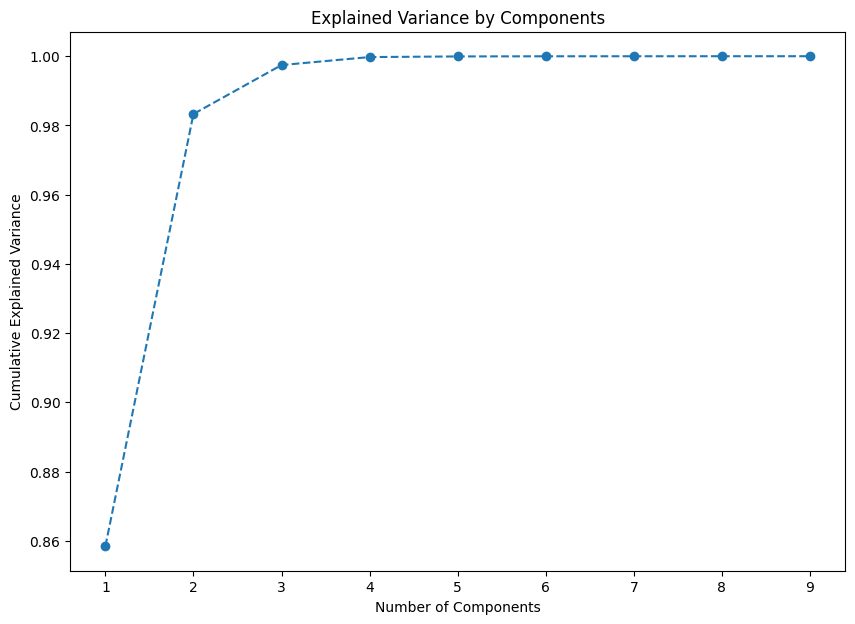

In [413]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_resampled)

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [414]:
# Example: Choose components that explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_resampled)

# Now, X_pca contains the reduced dataset
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [415]:
from sklearn.model_selection import train_test_split

# Assuming X_pca is your features after PCA and y_resampled is your target after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)


In [416]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\erik\anaconda3\envs\final_project\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [417]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=6, batch_size=32, verbose=1)


Epoch 1/6
61574/61574 ━━━━━━━━━━━━━━━━━━━━ 106s 2ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.9999 - val_loss: 0.0016
Epoch 2/6
61574/61574 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 3/6
61574/61574 ━━━━━━━━━━━━━━━━━━━━ 104s 2ms/step - accuracy: 0.9999 - loss: 8.4480e-04 - val_accuracy: 0.9999 - val_loss: 9.9510e-04
Epoch 4/6
61574/61574 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - accuracy: 0.9999 - loss: 8.5736e-04 - val_accuracy: 0.9999 - val_loss: 7.6934e-04
Epoch 5/6
61574/61574 ━━━━━━━━━━━━━━━━━━━━ 98s 2ms/step - accuracy: 0.9999 - loss: 8.5584e-04 - val_accuracy: 0.9999 - val_loss: 8.5557e-04
Epoch 6/6
61574/61574 ━━━━━━━━━━━━━━━━━━━━ 99s 2ms/step - accuracy: 0.9999 - loss: 7.2524e-04 - val_accuracy: 0.9999 - val_loss: 8.4080e-04


In [418]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


19242/19242 - 17s - 899us/step - accuracy: 0.9999 - loss: 7.8594e-04

Test accuracy: 0.9999188184738159


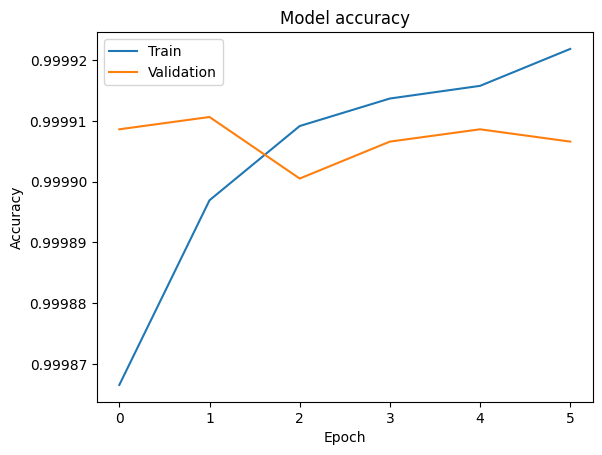

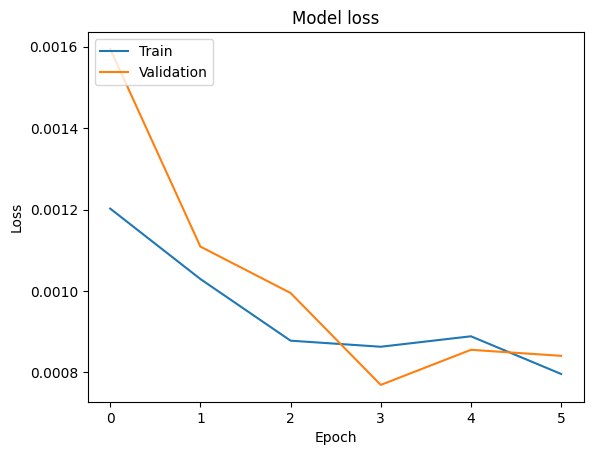

In [419]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [420]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output


19242/19242 ━━━━━━━━━━━━━━━━━━━━ 18s 929us/step


In [421]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


[[308175     50]
 [     0 307513]]


In [422]:
import keras

keras.saving.save_model(model, 'my_model.keras')

In [423]:
# Save the model
model.save('fraud_detection_model.h5')